# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [ ]:
!pip install openpyxl
!pip install pandas

In [1]:
import pandas as pd
import openpyxl

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [32]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=["Unknown", "UNKNOWN"])

df.head(5)


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [6]:
print(df.shape)

print(df.dtypes)

(81937, 15)
Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
## this dataset seems to organize data about licensed dogs in NYC as of April 2016, the rows are
# just owner zip-code cus their names were redacted (i'd guess as its FOIL). The columns are 
# identifying info about the dogs like "Animal Name" (name), "Primary Breed" (breed)
#  — which are as they seem.  

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
# what is the most licensed dog breed?
# what about least licensed dog breed?
# what it the zip code with the most licensed dogs?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [9]:
df["Primary Breed"].value_counts().sort_values(ascending=False).head(10)

Primary Breed
Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: count, dtype: int64

<Axes: xlabel='Primary Breed'>

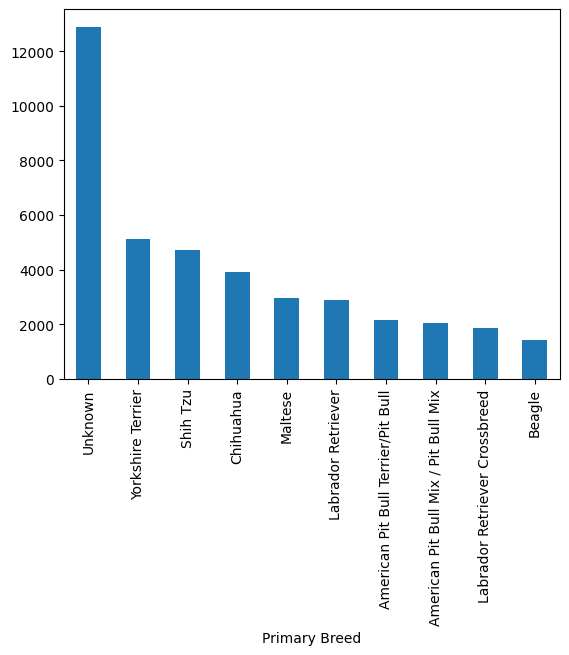

In [13]:
df["Primary Breed"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [20]:
df["Primary Breed"].value_counts(normalize=True, dropna=True)

df["Primary Breed"].value_counts().sort_values(ascending=False).head(10)



Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## What are the most popular dog names?

In [ ]:
df["Animal Name"].value_counts(normalize=True, dropna=True) # not sure why Unknown 
                                                        #isn't dropping since I added na_counts to my excel read-in
df["Animal Name"].value_counts().head(10)

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Rocky      354
Lucy       338
unknown    337
Coco       308
Buddy      300
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [38]:
df["Animal Name"].str.contains("Natalie|natalie|Nat|nat", na=False).sum()

np.int64(78)

In [36]:
df["Animal Name"].str.contains("Max|max", na=False).sum()

np.int64(976)

In [39]:
df["Animal Name"].str.contains("Maxwell|maxwell", na=False).sum()

np.int64(53)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [40]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [42]:
df["Guard or Trained"].value_counts(normalize=True)

Guard or Trained
No     0.998971
Yes    0.001029
Name: proportion, dtype: float64

## What are the actual numbers?

In [43]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [46]:
# NaN r missing is why... so numbers don't add up

df["Guard or Trained"].isna().sum()

np.int64(32361)

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [49]:
df["Guard or Trained"] = df["Guard or Trained"].fillna("No")

df["Guard or Trained"].value_counts()


Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [56]:
df[df["Guard or Trained"].str.contains("Yes", na=False)]["Primary Breed"].value_counts().head(3)

Primary Breed
German Shepherd Dog    4
Chihuahua              3
Labrador Retriever     3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [3]:
df["Year"] = df["Animal Birth"].dt.year

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [4]:
df["Age"] = 2025 - df["Year"]

In [5]:
df["Age"].mean()

np.float64(15.341848005174707)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [29]:
zip_df = pd.read_csv("zipcodes-neighborhoods.csv")

zip_df.head(5)

df = df.rename(columns={"Owner Zip Code": "zip"})

df["zip"] = df["zip"].astype(str)

zip_df["zip"] = zip_df["zip"].astype(str) 

merged = df.merge(zip_df, on="zip", how="left")

merged_clean = merged.dropna(subset=["neighborhood"])

merged_clean.head(10)

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,Manhattan
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,12,Greenwich Village and Soho,Manhattan
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,11,East Harlem,Manhattan
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,15,Southeast Bronx,Bronx
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,13,Greenwich Village and Soho,Manhattan
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,19,Greenwich Village and Soho,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [36]:
merged_clean[merged_clean["borough"].str.contains("Bronx", na=False)]["Animal Name"].value_counts()

Animal Name
Rocky                  60
Max                    56
Bella                  54
Lucky                  51
Princess               43
                       ..
Costello                1
Thunder Road            1
Boyd                    1
Montana Monti Nash      1
boo boo                 1
Name: count, Length: 4979, dtype: int64

In [ ]:
merged_clean[merged_clean["borough"].str.contains("Brooklyn", na=False)]["Animal Name"].value_counts()

## idk why unknowns are still here ?? but max and bella ig

Animal Name
unknown       234
UNKNOWN       155
Max           113
Bella         112
Charlie        96
             ... 
RASTA           1
Bella           1
Coco            1
Dominoe         1
Erie            1
Name: count, Length: 9813, dtype: int64

In [35]:
merged_clean[merged_clean["neighborhood"].str.contains("Upper East Side", na=False)]["Animal Name"].value_counts()

Animal Name
Lucy       40
Bella      31
Charlie    29
Coco       29
NO NAME    26
           ..
Zooey       1
LANA        1
Sihler      1
Nikki       1
Kira        1
Name: count, Length: 3218, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [46]:
merged_clean.groupby("neighborhood")["Primary Breed"].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                     
Borough Park                   Yorkshire Terrier                     115
Bronx Park and Fordham         Yorkshire Terrier                      88
Bushwick and Williamsburg      Yorkshire Terrier                     135
Canarsie and Flatlands         Yorkshire Terrier                     137
Central Bronx                  Yorkshire Terrier                      82
Central Brooklyn               Shih Tzu                              113
Central Harlem                 Yorkshire Terrier                     132
Central Queens                 Yorkshire Terrier                      67
Chelsea and Clinton            Chihuahua                             210
East Harlem                    Yorkshire Terrier                     129
East New York and New Lots     American Pit Bull Terrier/Pit Bull     87
Flatbush                       Shih Tzu                               78
Gramercy Park and Murray Hill  Yorkshire Terrier          

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [60]:
colors = ["Black", "BLACK", "White", "Charcoal", "Grey", "Gray", "WHITE"]

merged_clean["monochrome"] = (
    (merged_clean["Animal Dominant Color"].isin(colors) | merged_clean["Animal Dominant Color"].isna()) &
    (merged_clean["Animal Secondary Color"].isin(colors) | merged_clean["Animal Secondary Color"].isna()) &
    (merged_clean["Animal Third Color"].isin(colors) | merged_clean["Animal Third Color"].isna())
)

merged_clean["monochrome"].value_counts()


/var/folders/60/2gw19nzn43zdf99_4fqt2x6w0000gn/T/ipykernel_61937/2380067413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean["monochrome"] = (


monochrome
False    59856
True     21003
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: xlabel='borough'>

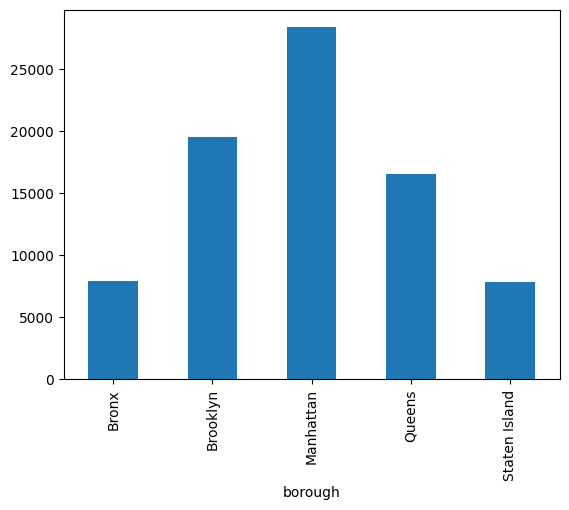

In [64]:
merged_clean.groupby("borough")["Animal Name"].count().plot(kind="bar")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
capita = pd.read_csv("boro_population.csv")

merged_final = merged_clean.merge(capita[["borough", "population", "area_sqmi"]], on="borough", how="left")

In [83]:
dog_count = merged_final.groupby("borough")["Animal Name"].count()

population = merged_final.groupby("borough")["population"].first()

per_cap_dog = dog_count / population

print(per_cap_dog)

borough
Bronx            0.005440
Brooklyn         0.007420
Manhattan        0.017260
Queens           0.007088
Staten Island    0.016527
dtype: float64


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: xlabel='borough'>

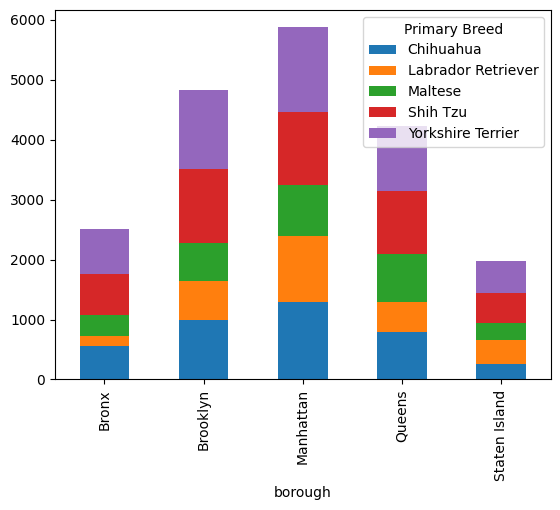

In [90]:
top_five = merged_final["Primary Breed"].value_counts().head(5).index
top_breeds = merged_final[merged_final["Primary Breed"].isin(top_five)]

top_breeds.groupby(["borough", "Primary Breed"]).size().unstack().plot(kind="bar", stacked=True)